# CSC420 Assignment 2
## Vladislav Trukhin

In [18]:
import numpy as np
import heapq
from skimage import io
from scipy import ndimage

# Question 1

## Part a

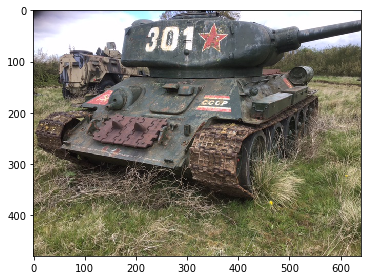

In [19]:
image = io.imread("t34.jpg")
io.imshow(image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


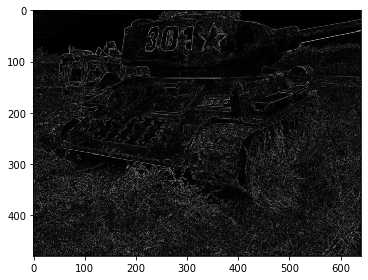

In [20]:
def magnitude_gradient(image):
    df1 = ndimage.convolve1d(0.299/256*image[:,:,0], np.array([-1, 1]), axis=0), ndimage.convolve1d(0.299/256*image[:,:,0], np.array([-1, 1]), axis=1)
    df2 = ndimage.convolve1d(0.587/256*image[:,:,1], np.array([-1, 1]), axis=0), ndimage.convolve1d(0.587/256*image[:,:,1], np.array([-1, 1]), axis=1)
    df3 = ndimage.convolve1d(0.114/256*image[:,:,2], np.array([-1, 1]), axis=0), ndimage.convolve1d(0.114/256*image[:,:,2], np.array([-1, 1]), axis=1)
    return np.sqrt(np.square(df1[0])+np.square(df1[1])) + np.sqrt(np.square(df2[0])+np.square(df2[1])) + np.sqrt(np.square(df3[0])+np.square(df3[1]))

image_grad_mag = magnitude_gradient(image)
io.imshow(image_grad_mag)
io.imsave("q1a.png", image_grad_mag)

## Part b

In [21]:
def carve_seam(image):
    image_grad_mag = magnitude_gradient(image)
    row, col = np.shape(image_grad_mag)

    queue = []
    in_queue = np.zeros(np.shape(image_grad_mag), dtype=np.int_)
    path = np.zeros(np.shape(image_grad_mag), dtype=np.int_)

    # Add entire first row to priority queue
    for j in range(col):
        heapq.heappush(queue, (image_grad_mag[0, j], (0, j)))
        in_queue[0, j] = 1
        path[0, j] = j

    # Iterate through queue
    coord = (-1, -1)
    while queue:
        # Pop smallest cost coordinate and mark as in queue
        cost, curr_coord = heapq.heappop(queue)
        # If reached last row, optimal path has been found
        if curr_coord[0] == row-1:
            coord = curr_coord
            break
        # Add neighbours of current coordinate not previously in queue to priority queue
        for i in [-1, 0, 1]:
            neigh_coord = curr_coord[0] + 1, curr_coord[1] + i
            if neigh_coord[1] >= 0 and neigh_coord[1] <= col-1 and in_queue[neigh_coord] == 0:
                heapq.heappush(queue, (cost + image_grad_mag[neigh_coord], neigh_coord))
                in_queue[neigh_coord] = 1
                path[neigh_coord] = curr_coord[1]

    # Build seam path and illustrate seam on image
    image_w_seam = image.copy()
    vertical_seam = []
    while coord[0] >= 0:
        vertical_seam.append(coord)
        image_w_seam[coord] = 255
        coord = coord[0] - 1, path[coord]
    vertical_seam.reverse()

    # Remove seam
    image_wo_seam_c0 = np.delete(image[0,:,0], vertical_seam[0][1])
    image_wo_seam_c1 = np.delete(image[0,:,1], vertical_seam[0][1])
    image_wo_seam_c2 = np.delete(image[0,:,2], vertical_seam[0][1])
    for j in range(1, row):
        image_wo_seam_c0 = np.vstack((image_wo_seam_c0, np.delete(image[j,:,0], vertical_seam[j][1])))
        image_wo_seam_c1 = np.vstack((image_wo_seam_c1, np.delete(image[j,:,1], vertical_seam[j][1])))
        image_wo_seam_c2 = np.vstack((image_wo_seam_c2, np.delete(image[j,:,2], vertical_seam[j][1])))
    image_wo_seam = np.array([image_wo_seam_c0.T, image_wo_seam_c1.T, image_wo_seam_c2.T]).T

    return image_w_seam, image_wo_seam
    
w_seam, wo_seam = carve_seam(image)

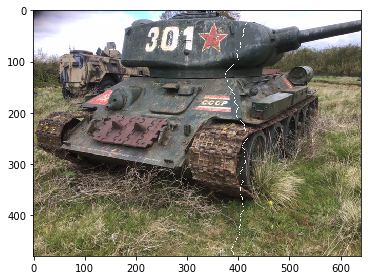

In [22]:
io.imshow(w_seam)
io.imsave("q1b.png", w_seam)

## Part c

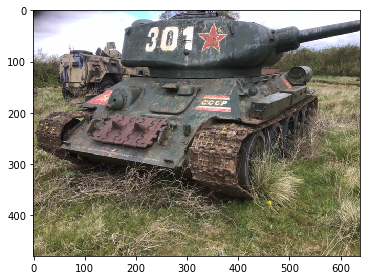

In [23]:
io.imshow(wo_seam)
io.imsave("q1c.png", wo_seam)

## Part d

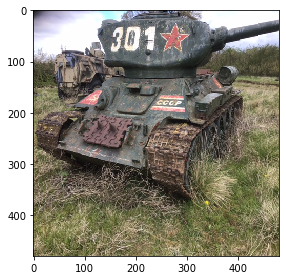

In [24]:
wo_seam = image
for i in range(160):
    wo_seam = carve_seam(wo_seam)[1]
io.imshow(wo_seam)
io.imsave("q1d.png", wo_seam)

# Question 2

$h=[0,\frac{1}{d},...,\frac{d-1}{d},1,\frac{d-1}{d},...,\frac{1}{d},0]$

$G(i) = \Sigma_{u=-d}^dh(u)*I(i-u)$

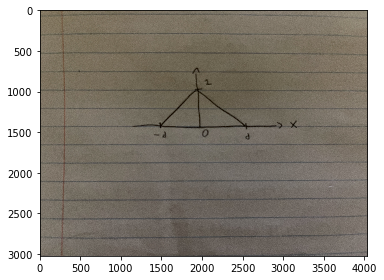

In [25]:
image = io.imread("q2.jpg")
io.imshow(image)

# Question 3

In [50]:
import re
import matplotlib.pyplot as plt

0.88158
0.8781


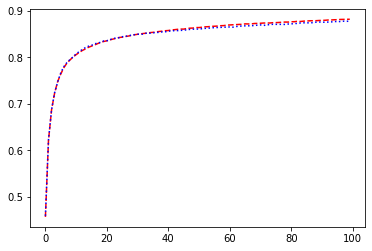

In [51]:
train = []
test = []

with open("results/log_one_layer_nn") as file:
    while line := file.readline():
        acc = re.findall("\d+\.\d+", line.rstrip())
        if (acc):
            train.append(float(acc[0]))
            test.append(float(acc[1]))

plt.plot(train, 'r--')
plt.plot(test, 'b:')
print(max(train))
print(max(test))

0.8781
0.8712


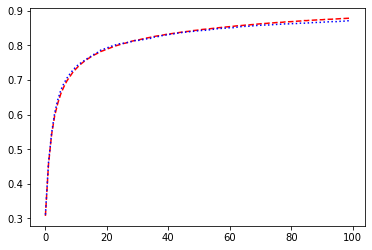

In [52]:
train = []
test = []

with open("results/log_two_layer_nn") as file:
    while line := file.readline():
        acc = re.findall("\d+\.\d+", line.rstrip())
        if (acc):
            train.append(float(acc[0]))
            test.append(float(acc[1]))

plt.plot(train, 'r--')
plt.plot(test, 'b:')
print(max(train))
print(max(test))